In [37]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math
import seaborn as sns
from scipy.stats import zscore
%matplotlib inline

In [38]:
path="/home/tecomp/Downloads/melb_data.csv"
data=pd.read_csv(path)
print(data)

              Suburb           Address  Rooms Type    Price Method   SellerG   
0         Abbotsford      85 Turner St      2    h       14      S    Biggin  \
1         Abbotsford   25 Bloomburg St      2    h  1035000      S    Biggin   
2         Abbotsford      5 Charles St      3    h  1465000     SP    Biggin   
3         Abbotsford  40 Federation La      3    h   850000     PI    Biggin   
4         Abbotsford       55a Park St      4    h  1600000     VB    Nelson   
...              ...               ...    ...  ...      ...    ...       ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000      S     Barry   
13576   Williamstown     77 Merrett Dr      3    h  1031000     SP  Williams   
13577   Williamstown       83 Power St      3    h  1170000      S     Raine   
13578   Williamstown      96 Verdon St      4    h  2500000     PI   Sweeney   
13579     Yarraville        6 Agnes St      4    h  1285000     SP   Village   

             Date  Distance  Postcode  

In [39]:
data

Suburb           Address  Rooms Type    Price Method   SellerG   
0         Abbotsford      85 Turner St      2    h       14      S    Biggin  \
1         Abbotsford   25 Bloomburg St      2    h  1035000      S    Biggin   
2         Abbotsford      5 Charles St      3    h  1465000     SP    Biggin   
3         Abbotsford  40 Federation La      3    h   850000     PI    Biggin   
4         Abbotsford       55a Park St      4    h  1600000     VB    Nelson   
...              ...               ...    ...  ...      ...    ...       ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000      S     Barry   
13576   Williamstown     77 Merrett Dr      3    h  1031000     SP  Williams   
13577   Williamstown       83 Power St      3    h  1170000      S     Raine   
13578   Williamstown      96 Verdon St      4    h  2500000     PI   Sweeney   
13579     Yarraville        6 Agnes St      4    h  1285000     SP   Village   

             Date  Distance  Postcode  ...  Bathroom  Car  Landsize   
0       3/12/2016       2.5      3067  ...         1  1.0       202  \
1       4/02/2016       2.5      3067  ...         1  0.0       156   
2       4/03/2017       2.5      3067  ...         2  0.0       134   
3       4/03/2017       2.5      3067  ...         2  1.0        94   
4       4/06/2016       2.5      3067  ...         1  2.0       120   
...           ...       ...       ...  ...       ...  ...       ...   
13575  26/08/2017      16.7      3150  ...         2  2.0       652   
13576  26/08/2017       6.8      3016  ...         2  2.0       333   
13577  26/08/2017       6.8      3016  ...         2  4.0       436   
13578  26/08/2017       6.8      3016  ...         1  5.0       866   
13579  26/08/2017       6.3      3013  ...         1  1.0       362   

       BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude   
0               NaN        NaN        Yarra -37.79960   144.99840  \
1              79.0     1900.0        Yarra -37.80790   144.99340   
2             150.0     1900.0        Yarra -37.80930   144.99440   
3               NaN        NaN        Yarra -37.79690   144.99690   
4             142.0     2014.0        Yarra -37.80720   144.99410   
...             ...        ...          ...       ...         ...   
13575           NaN     1981.0          NaN -37.90562   145.16761   
13576         133.0     1995.0          NaN -37.85927   144.87904   
13577           NaN     1997.0          NaN -37.85274   144.88738   
13578         157.0     1920.0          NaN -37.85908   144.89299   
13579         112.0     1920.0          NaN -37.81188   144.88449   

                       Regionname Propertycount  
0           Northern Metropolitan          4019  
1           Northern Metropolitan          4019  
2           Northern Metropolitan          4019  
3           Northern Metropolitan          4019  
4           Northern Metropolitan          4019  
...                           ...           ...  
13575  South-Eastern Metropolitan          7392  
13576        Western Metropolitan          6380  
13577        Western Metropolitan          6380  
13578        Western Metropolitan          6380  
13579        Western Metropolitan          6543  

[13580 rows x 21 columns]

In [40]:
print("The first five rows are as follows: ")
data.head()

The first five rows are as follows: 


Suburb           Address  Rooms Type    Price Method SellerG   
0  Abbotsford      85 Turner St      2    h       14      S  Biggin  \
1  Abbotsford   25 Bloomburg St      2    h  1035000      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea   
0  3/12/2016       2.5      3067  ...         1  1.0       202           NaN  \
1  4/02/2016       2.5      3067  ...         1  0.0       156          79.0   
2  4/03/2017       2.5      3067  ...         2  0.0       134         150.0   
3  4/03/2017       2.5      3067  ...         2  1.0        94           NaN   
4  4/06/2016       2.5      3067  ...         1  2.0       120         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname   
0        NaN        Yarra  -37.7996    144.9984  Northern Metropolitan  \
1     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   
2     1900.0        Yarra  -37.8093    144.9944  Northern Metropolitan   
3        NaN        Yarra  -37.7969    144.9969  Northern Metropolitan   
4     2014.0        Yarra  -37.8072    144.9941  Northern Metropolitan   

  Propertycount  
0          4019  
1          4019  
2          4019  
3          4019  
4          4019  

[5 rows x 21 columns]

In [41]:
print("The last five rows are as follows: ")
data.tail()

The last five rows are as follows: 


Suburb        Address  Rooms Type    Price Method   SellerG   
13575  Wheelers Hill   12 Strada Cr      4    h  1245000      S     Barry  \
13576   Williamstown  77 Merrett Dr      3    h  1031000     SP  Williams   
13577   Williamstown    83 Power St      3    h  1170000      S     Raine   
13578   Williamstown   96 Verdon St      4    h  2500000     PI   Sweeney   
13579     Yarraville     6 Agnes St      4    h  1285000     SP   Village   

             Date  Distance  Postcode  ...  Bathroom  Car  Landsize   
13575  26/08/2017      16.7      3150  ...         2  2.0       652  \
13576  26/08/2017       6.8      3016  ...         2  2.0       333   
13577  26/08/2017       6.8      3016  ...         2  4.0       436   
13578  26/08/2017       6.8      3016  ...         1  5.0       866   
13579  26/08/2017       6.3      3013  ...         1  1.0       362   

       BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude   
13575           NaN     1981.0          NaN -37.90562   145.16761  \
13576         133.0     1995.0          NaN -37.85927   144.87904   
13577           NaN     1997.0          NaN -37.85274   144.88738   
13578         157.0     1920.0          NaN -37.85908   144.89299   
13579         112.0     1920.0          NaN -37.81188   144.88449   

                       Regionname Propertycount  
13575  South-Eastern Metropolitan          7392  
13576        Western Metropolitan          6380  
13577        Western Metropolitan          6380  
13578        Western Metropolitan          6380  
13579        Western Metropolitan          6543  

[5 rows x 21 columns]

In [42]:
# Describtion about the dataset
data.describe()

Rooms         Price      Distance      Postcode      Bedroom2   
count  13580.000000  1.358000e+04  13580.000000  13580.000000  13580.000000  \
mean       2.937997  1.075575e+06     10.137776   3105.301915      2.914728   
std        0.955748  6.393679e+05      5.868725     90.676964      0.965921   
min        1.000000  1.400000e+01      0.000000   3000.000000      0.000000   
25%        2.000000  6.500000e+05      6.100000   3044.000000      2.000000   
50%        3.000000  9.030000e+05      9.200000   3084.000000      3.000000   
75%        3.000000  1.330000e+06     13.000000   3148.000000      3.000000   
max       10.000000  9.000000e+06     48.100000   3977.000000     20.000000   

           Bathroom           Car       Landsize  BuildingArea    YearBuilt   
count  13580.000000  13518.000000   13580.000000   7130.000000  8205.000000  \
mean       1.534242      1.610075     558.416127    151.967650  1964.684217   
std        0.691712      0.962634    3990.669241    541.014538    37.273762   
min        0.000000      0.000000       0.000000      0.000000  1196.000000   
25%        1.000000      1.000000     177.000000     93.000000  1940.000000   
50%        1.000000      2.000000     440.000000    126.000000  1970.000000   
75%        2.000000      2.000000     651.000000    174.000000  1999.000000   
max        8.000000     10.000000  433014.000000  44515.000000  2018.000000   

          Lattitude    Longtitude  Propertycount  
count  13580.000000  13580.000000   13580.000000  
mean     -37.809203    144.995216    7454.417378  
std        0.079260      0.103916    4378.581772  
min      -38.182550    144.431810     249.000000  
25%      -37.856822    144.929600    4380.000000  
50%      -37.802355    145.000100    6555.000000  
75%      -37.756400    145.058305   10331.000000  
max      -37.408530    145.526350   21650.000000

In [43]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [44]:
print("The column names of the dataset are as follows: ")
data.columns

The column names of the dataset are as follows: 


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [45]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

<AxesSubplot:ylabel='Price'>

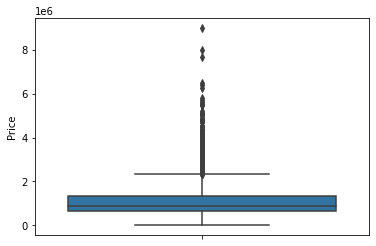

In [46]:
sns.boxplot(y=data['Price'])

<AxesSubplot:ylabel='Distance'>

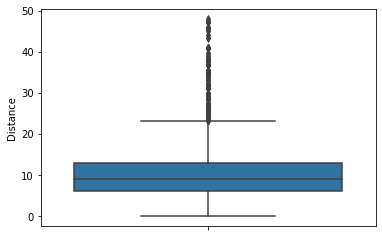

In [47]:
sns.boxplot(y=data['Distance'])

In [77]:
sns.countplot(data=df, x=df['Distance']);

NameError: name 'df' is not defined

In [49]:
def fun1(val):
    return int(math.floor(val))

In [50]:
data["Price"] = data["Price"].apply(fun1)

In [51]:
data

Suburb           Address  Rooms Type    Price Method   SellerG   
0         Abbotsford      85 Turner St      2    h       14      S    Biggin  \
1         Abbotsford   25 Bloomburg St      2    h  1035000      S    Biggin   
2         Abbotsford      5 Charles St      3    h  1465000     SP    Biggin   
3         Abbotsford  40 Federation La      3    h   850000     PI    Biggin   
4         Abbotsford       55a Park St      4    h  1600000     VB    Nelson   
...              ...               ...    ...  ...      ...    ...       ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000      S     Barry   
13576   Williamstown     77 Merrett Dr      3    h  1031000     SP  Williams   
13577   Williamstown       83 Power St      3    h  1170000      S     Raine   
13578   Williamstown      96 Verdon St      4    h  2500000     PI   Sweeney   
13579     Yarraville        6 Agnes St      4    h  1285000     SP   Village   

             Date  Distance  Postcode  ...  Bathroom  Car  Landsize   
0       3/12/2016       2.5      3067  ...         1  1.0       202  \
1       4/02/2016       2.5      3067  ...         1  0.0       156   
2       4/03/2017       2.5      3067  ...         2  0.0       134   
3       4/03/2017       2.5      3067  ...         2  1.0        94   
4       4/06/2016       2.5      3067  ...         1  2.0       120   
...           ...       ...       ...  ...       ...  ...       ...   
13575  26/08/2017      16.7      3150  ...         2  2.0       652   
13576  26/08/2017       6.8      3016  ...         2  2.0       333   
13577  26/08/2017       6.8      3016  ...         2  4.0       436   
13578  26/08/2017       6.8      3016  ...         1  5.0       866   
13579  26/08/2017       6.3      3013  ...         1  1.0       362   

       BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude   
0               NaN        NaN        Yarra -37.79960   144.99840  \
1              79.0     1900.0        Yarra -37.80790   144.99340   
2             150.0     1900.0        Yarra -37.80930   144.99440   
3               NaN        NaN        Yarra -37.79690   144.99690   
4             142.0     2014.0        Yarra -37.80720   144.99410   
...             ...        ...          ...       ...         ...   
13575           NaN     1981.0          NaN -37.90562   145.16761   
13576         133.0     1995.0          NaN -37.85927   144.87904   
13577           NaN     1997.0          NaN -37.85274   144.88738   
13578         157.0     1920.0          NaN -37.85908   144.89299   
13579         112.0     1920.0          NaN -37.81188   144.88449   

                       Regionname Propertycount  
0           Northern Metropolitan          4019  
1           Northern Metropolitan          4019  
2           Northern Metropolitan          4019  
3           Northern Metropolitan          4019  
4           Northern Metropolitan          4019  
...                           ...           ...  
13575  South-Eastern Metropolitan          7392  
13576        Western Metropolitan          6380  
13577        Western Metropolitan          6380  
13578        Western Metropolitan          6380  
13579        Western Metropolitan          6543  

[13580 rows x 21 columns]

In [52]:
# 1. Handling missing values and inconsistencies
#    Filling missing values in 'BuildingArea' with the mean of the column
data['BuildingArea'].fillna(data['BuildingArea'].mean(), inplace=True)

In [53]:
display(data)

Suburb           Address  Rooms Type    Price Method   SellerG   
0         Abbotsford      85 Turner St      2    h       14      S    Biggin  \
1         Abbotsford   25 Bloomburg St      2    h  1035000      S    Biggin   
2         Abbotsford      5 Charles St      3    h  1465000     SP    Biggin   
3         Abbotsford  40 Federation La      3    h   850000     PI    Biggin   
4         Abbotsford       55a Park St      4    h  1600000     VB    Nelson   
...              ...               ...    ...  ...      ...    ...       ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000      S     Barry   
13576   Williamstown     77 Merrett Dr      3    h  1031000     SP  Williams   
13577   Williamstown       83 Power St      3    h  1170000      S     Raine   
13578   Williamstown      96 Verdon St      4    h  2500000     PI   Sweeney   
13579     Yarraville        6 Agnes St      4    h  1285000     SP   Village   

             Date  Distance  Postcode  ...  Bathroom  Car  Landsize   
0       3/12/2016       2.5      3067  ...         1  1.0       202  \
1       4/02/2016       2.5      3067  ...         1  0.0       156   
2       4/03/2017       2.5      3067  ...         2  0.0       134   
3       4/03/2017       2.5      3067  ...         2  1.0        94   
4       4/06/2016       2.5      3067  ...         1  2.0       120   
...           ...       ...       ...  ...       ...  ...       ...   
13575  26/08/2017      16.7      3150  ...         2  2.0       652   
13576  26/08/2017       6.8      3016  ...         2  2.0       333   
13577  26/08/2017       6.8      3016  ...         2  4.0       436   
13578  26/08/2017       6.8      3016  ...         1  5.0       866   
13579  26/08/2017       6.3      3013  ...         1  1.0       362   

       BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude   
0         151.96765        NaN        Yarra -37.79960   144.99840  \
1          79.00000     1900.0        Yarra -37.80790   144.99340   
2         150.00000     1900.0        Yarra -37.80930   144.99440   
3         151.96765        NaN        Yarra -37.79690   144.99690   
4         142.00000     2014.0        Yarra -37.80720   144.99410   
...             ...        ...          ...       ...         ...   
13575     151.96765     1981.0          NaN -37.90562   145.16761   
13576     133.00000     1995.0          NaN -37.85927   144.87904   
13577     151.96765     1997.0          NaN -37.85274   144.88738   
13578     157.00000     1920.0          NaN -37.85908   144.89299   
13579     112.00000     1920.0          NaN -37.81188   144.88449   

                       Regionname Propertycount  
0           Northern Metropolitan          4019  
1           Northern Metropolitan          4019  
2           Northern Metropolitan          4019  
3           Northern Metropolitan          4019  
4           Northern Metropolitan          4019  
...                           ...           ...  
13575  South-Eastern Metropolitan          7392  
13576        Western Metropolitan          6380  
13577        Western Metropolitan          6380  
13578        Western Metropolitan          6380  
13579        Western Metropolitan          6543  

[13580 rows x 21 columns]

In [54]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea        0
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [57]:
# Handling outliers in numeric variables using Z-score
#   - Identifying and removing rows with outliers in 'Price'
z_scores = np.abs(zscore(data['Price']))
df_no_outliers = data[(z_scores < 3)] 

In [56]:
display(data)

Suburb           Address  Rooms Type    Price Method   SellerG   
0         Abbotsford      85 Turner St      2    h       14      S    Biggin  \
1         Abbotsford   25 Bloomburg St      2    h  1035000      S    Biggin   
2         Abbotsford      5 Charles St      3    h  1465000     SP    Biggin   
3         Abbotsford  40 Federation La      3    h   850000     PI    Biggin   
4         Abbotsford       55a Park St      4    h  1600000     VB    Nelson   
...              ...               ...    ...  ...      ...    ...       ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000      S     Barry   
13576   Williamstown     77 Merrett Dr      3    h  1031000     SP  Williams   
13577   Williamstown       83 Power St      3    h  1170000      S     Raine   
13578   Williamstown      96 Verdon St      4    h  2500000     PI   Sweeney   
13579     Yarraville        6 Agnes St      4    h  1285000     SP   Village   

             Date  Distance  Postcode  ...  Bathroom  Car  Landsize   
0       3/12/2016       2.5      3067  ...         1  1.0       202  \
1       4/02/2016       2.5      3067  ...         1  0.0       156   
2       4/03/2017       2.5      3067  ...         2  0.0       134   
3       4/03/2017       2.5      3067  ...         2  1.0        94   
4       4/06/2016       2.5      3067  ...         1  2.0       120   
...           ...       ...       ...  ...       ...  ...       ...   
13575  26/08/2017      16.7      3150  ...         2  2.0       652   
13576  26/08/2017       6.8      3016  ...         2  2.0       333   
13577  26/08/2017       6.8      3016  ...         2  4.0       436   
13578  26/08/2017       6.8      3016  ...         1  5.0       866   
13579  26/08/2017       6.3      3013  ...         1  1.0       362   

       BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude   
0         151.96765        NaN        Yarra -37.79960   144.99840  \
1          79.00000     1900.0        Yarra -37.80790   144.99340   
2         150.00000     1900.0        Yarra -37.80930   144.99440   
3         151.96765        NaN        Yarra -37.79690   144.99690   
4         142.00000     2014.0        Yarra -37.80720   144.99410   
...             ...        ...          ...       ...         ...   
13575     151.96765     1981.0          NaN -37.90562   145.16761   
13576     133.00000     1995.0          NaN -37.85927   144.87904   
13577     151.96765     1997.0          NaN -37.85274   144.88738   
13578     157.00000     1920.0          NaN -37.85908   144.89299   
13579     112.00000     1920.0          NaN -37.81188   144.88449   

                       Regionname Propertycount  
0           Northern Metropolitan          4019  
1           Northern Metropolitan          4019  
2           Northern Metropolitan          4019  
3           Northern Metropolitan          4019  
4           Northern Metropolitan          4019  
...                           ...           ...  
13575  South-Eastern Metropolitan          7392  
13576        Western Metropolitan          6380  
13577        Western Metropolitan          6380  
13578        Western Metropolitan          6380  
13579        Western Metropolitan          6543  

[13580 rows x 21 columns]

In [75]:
# 1. Identify outliers using Z-score
z_scores = zscore(data['Price'])
outliers = (z_scores > 3) | (z_scores < -3)
outliers_count = sum(outliers)

In [76]:
print(f"Number of outliers in 'Price': {outliers_count}")

Number of outliers in 'Price': 232


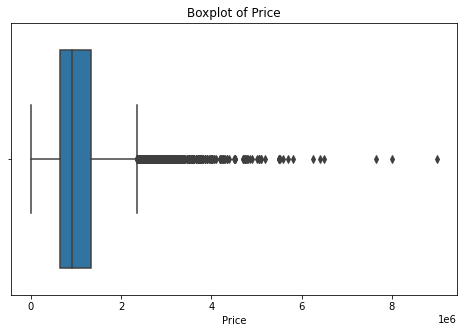

In [73]:
# 2. Visualize the distribution of 'Price' to understand outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Price'])
plt.title('Boxplot of Price')
plt.show()

In [74]:
# 3. Handle outliers (by removing them)
data_no_outliers = data[~outliers]

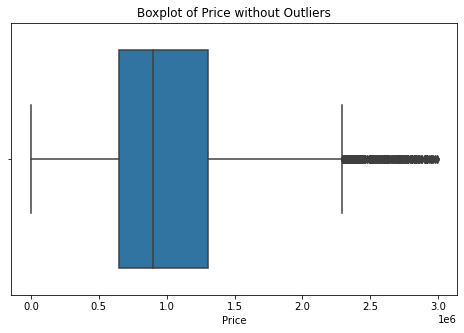

In [69]:
# 4. Visualize the distribution without outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=data_no_outliers['Price'])
plt.title('Boxplot of Price without Outliers')
plt.show()

In [85]:
# 3. Apply data transformation to decrease skewness (log transformation on 'Price')
#    to decrease skewness and move towards a more normal distribution
data['Price_log'] = data['Price'].apply(lambda x: np.log(x) if x > 0 else 0)

In [86]:
# Convert the Series to a NumPy array before applying the transformation
data['Price_log'] = np.array(data['Price_log'])

In [87]:
# Visualize the original and transformed distribution
plt.figure(figsize=(12, 5))

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

Text(0.5, 1.0, 'Original Price Distribution')

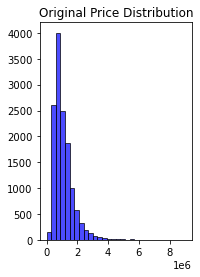

In [90]:
# Original distribution
plt.subplot(1, 2, 1)
plt.hist(data['Price'].values, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Original Price Distribution')

Text(0.5, 1.0, 'Log-transformed Price Distribution')

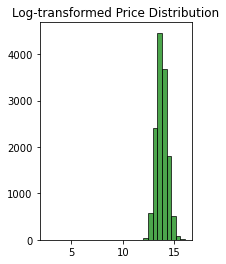

In [94]:
# Transformed distribution
plt.subplot(1, 2, 2)
plt.hist(data['Price_log'].values, bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title('Log-transformed Price Distribution')

In [95]:
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Original Price Distribution')

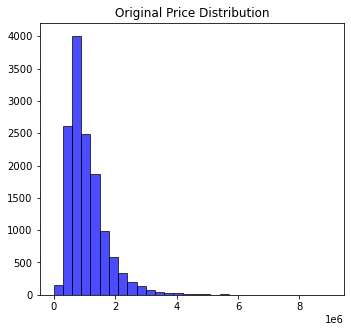

In [97]:
# Original distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(data['Price'].values, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Original Price Distribution')

In [98]:
# Apply logarithmic transformation to 'Price'
data['Log_Price'] = np.log1p(data['Price'])  # Using np.log1p to handle zero values

Text(0.5, 1.0, 'Log-transformed Price Distribution')

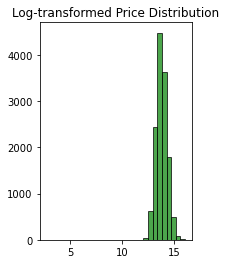

In [99]:
# Transformed distribution
plt.subplot(1, 2, 2)
plt.hist(data['Log_Price'].values, bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title('Log-transformed Price Distribution')

In [100]:
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>